In [2]:
import numpy as np
import torch
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np 
import math 
from skimage.io import imread, imshow
import os
import random
#import cv2

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


**Carga de datos local**

In [4]:
path_Covid = r'C:\Users\Cracker31\Desktop\JOSE\maestria\UTEC\ciclo2\ai\proyecto3\archive\COVID-19_Radiography_Dataset\COVID' 
path_Normal = r'C:\Users\Cracker31\Desktop\JOSE\maestria\UTEC\ciclo2\ai\proyecto3\archive\COVID-19_Radiography_Dataset\Normal'
path_Lung_Opacity = r'C:\Users\Cracker31\Desktop\JOSE\maestria\UTEC\ciclo2\ai\proyecto3\archive\COVID-19_Radiography_Dataset\Lung_Opacity'
path_Viral_Pneumonia = r'C:\Users\Cracker31\Desktop\JOSE\maestria\UTEC\ciclo2\ai\proyecto3\archive\COVID-19_Radiography_Dataset\Viral Pneumonia'

In [5]:
#### Funcion para leer imagenes dentro de una carpeta
width = 299
height = 299
#files = 3000
def imageReading (path,files):
    folderFilesids = os.listdir(path)
    filesRandom = random.sample(folderFilesids, files)
    #folderFilesids = os.listdir(path)
    images = np.zeros((files, height, width))
    for count, n in enumerate(filesRandom):
        if(count == files):
          break
        else:
          path1 = path + '\\' + n
          originalImage = imread(path1)
          if (len(originalImage.shape)==2):
              originalImage = imread(path1)[:,:]
          if (len(originalImage.shape)==3):
              originalImage = imread(path1)[:,:,0]
          #print(originalImage.shape)
          images[count] = originalImage
    imshow(images[0])
    plt.show()
    return images
"""
#### Funcion para leer imagenes dentro de una carpeta
width = 299
height = 299
def imageReading (path):
    folderFilesids = os.listdir(path)
    images = np.zeros((len(folderFilesids), height, width))
    for count, n in enumerate(folderFilesids):
        path1 = path + '\\' + n
        originalImage = imread(path1)
        if (len(originalImage.shape)==2):
            originalImage = imread(path1)[:,:]
        if (len(originalImage.shape)==3):
            originalImage = imread(path1)[:,:,0]
        #print(originalImage.shape)
        images[count] = originalImage
    imshow(images[0])
    plt.show()
    return images
"""

"\n#### Funcion para leer imagenes dentro de una carpeta\nwidth = 299\nheight = 299\ndef imageReading (path):\n    folderFilesids = os.listdir(path)\n    images = np.zeros((len(folderFilesids), height, width))\n    for count, n in enumerate(folderFilesids):\n        path1 = path + '\\' + n\n        originalImage = imread(path1)\n        if (len(originalImage.shape)==2):\n            originalImage = imread(path1)[:,:]\n        if (len(originalImage.shape)==3):\n            originalImage = imread(path1)[:,:,0]\n        #print(originalImage.shape)\n        images[count] = originalImage\n    imshow(images[0])\n    plt.show()\n    return images\n"

C:\Users\Cracker31\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


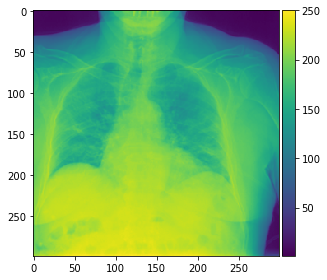

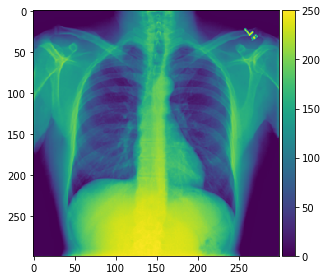

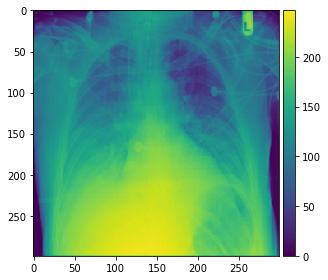

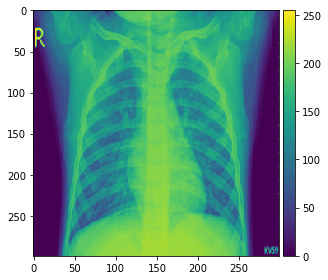

In [6]:
cantidadImg = 2000
covid = imageReading(path_Covid,cantidadImg)
normal = imageReading(path_Normal,cantidadImg)
Lung_Opacity = imageReading(path_Lung_Opacity,cantidadImg)
Viral_Pneumonia = imageReading(path_Viral_Pneumonia,1000)

In [7]:
covid.shape

(2000, 299, 299)

In [8]:
normal.shape

(2000, 299, 299)

In [9]:
Lung_Opacity.shape

(2000, 299, 299)

In [10]:
Viral_Pneumonia.shape

(1000, 299, 299)

**Agregando dimensiones para que sea leido por pytorch**

In [7]:
covid = torch.from_numpy(np.array(covid).reshape(-1,1,299,299)) ## torch se convierte nuestra data en tensor - Aumenta la dimension.
normal = torch.from_numpy(np.array(normal).reshape(-1,1,299,299)) # (-1: Cantidad de imagenes, 1: gris o color, 299 x 299: tamaño de la imagen
Lung_Opacity = torch.from_numpy(np.array(Lung_Opacity).reshape(-1,1,299,299))
Viral_Pneumonia = torch.from_numpy(np.array(Viral_Pneumonia).reshape(-1,1,299,299))

In [12]:
covid.shape

torch.Size([2000, 1, 299, 299])

In [13]:
covid[0]

tensor([[[ 9.,  9.,  8.,  ...,  5.,  5.,  4.],
         [ 9.,  9.,  9.,  ...,  5.,  5.,  5.],
         [ 9.,  9.,  9.,  ...,  5.,  5.,  5.],
         ...,
         [24., 26., 27.,  ..., 20., 18., 16.],
         [30., 30., 31.,  ..., 24., 22., 20.],
         [35., 35., 35.,  ..., 27., 26., 23.]]], dtype=torch.float64)

### Agregamos las etiquetas y transformamos a tuple

In [8]:
img_covidlist = []
for i in range(covid.shape[0]):
      img_covidlist.append((covid[i]/255.0,0.0))

img_normallist = []
for i in range(normal.shape[0]):
      img_normallist.append((normal[i]/255.0,1.0))
        
img_Lung_Opacitylist = []
for i in range(Lung_Opacity.shape[0]):
      img_Lung_Opacitylist.append((Lung_Opacity[i]/255.0,2.0))
    
img_Viral_Pneumonialist = []
for i in range(Viral_Pneumonia.shape[0]):
      img_Viral_Pneumonialist.append((Viral_Pneumonia[i]/255.0,3.0))

In [15]:
img_normallist[0]

(tensor([[[0.0471, 0.0431, 0.0431,  ..., 0.1216, 0.1882, 0.2588],
          [0.0431, 0.0392, 0.0392,  ..., 0.1176, 0.1843, 0.2549],
          [0.0431, 0.0392, 0.0392,  ..., 0.1137, 0.1804, 0.2510],
          ...,
          [0.0941, 0.0824, 0.0745,  ..., 0.1608, 0.2078, 0.2314],
          [0.1294, 0.1059, 0.0980,  ..., 0.2000, 0.2471, 0.2706],
          [0.1647, 0.1412, 0.1333,  ..., 0.2471, 0.3020, 0.3216]]],
        dtype=torch.float64),
 1.0)

### Verificar el Slicing y tamaño de las listas

In [9]:
import random
random.shuffle(img_covidlist)
covid_train = img_covidlist[0:int(len(img_covidlist)*0.7)]
covid_validation = img_covidlist[int(len(img_covidlist)*0.7):int(len(img_covidlist)*0.9)]
covid_test = img_covidlist[int(len(img_covidlist)*0.9):]

random.shuffle(img_normallist)
normal_train = img_normallist[0:int(len(img_normallist)*0.7)]
normal_validation = img_normallist[int(len(img_normallist)*0.7):int(len(img_normallist)*0.9)]
normal_test = img_normallist[int(len(img_normallist)*0.9):]

random.shuffle(img_Lung_Opacitylist)
Lung_Opacitylist_train = img_Lung_Opacitylist[0:int(len(img_Lung_Opacitylist)*0.7)]
Lung_Opacitylist_validation = img_Lung_Opacitylist[int(len(img_Lung_Opacitylist)*0.7):int(len(img_Lung_Opacitylist)*0.9)]
Lung_Opacitylist_test = img_Lung_Opacitylist[int(len(img_Lung_Opacitylist)*0.9):]

random.shuffle(img_Viral_Pneumonialist)
Viral_Pneumonialist_train = img_Viral_Pneumonialist[0:int(len(img_Viral_Pneumonialist)*0.7)]
Viral_Pneumonialist_validation = img_Viral_Pneumonialist[int(len(img_Viral_Pneumonialist)*0.7):int(len(img_Viral_Pneumonialist)*0.9)]
Viral_Pneumonialist_test = img_Viral_Pneumonialist[int(len(img_Viral_Pneumonialist)*0.9):]


### COVID 

In [10]:
print("El tamaño de la muestra COVID del training es {}, la validacion {} y del test es {}"\
      .format(len(covid_train), len(covid_validation),len(covid_test)))

El tamaño de la muestra COVID del training es 1400, la validacion 400 y del test es 200


### NORMAL

In [11]:
print("El tamaño de la muestra NORMAL del training es {}, la validacion {} y del test es {}"\
      .format(len(normal_train), len(normal_validation),len(normal_test)))

El tamaño de la muestra NORMAL del training es 1400, la validacion 400 y del test es 200


### LUNG OPACITY

In [12]:
print("El tamaño de la muestra LUNG_OPACITY del training es {}, la validacion {} y del test es {}"\
      .format(len(Lung_Opacitylist_train), len(Lung_Opacitylist_validation),len(Lung_Opacitylist_test)))

El tamaño de la muestra LUNG_OPACITY del training es 1400, la validacion 400 y del test es 200


### VIRAL PNEUMONIALIST

In [13]:
print("El tamaño de la muestra VIRAL PNEUMONIA del training es {}, la validacion {} y del test es {}"\
      .format(len(Viral_Pneumonialist_train), len(Viral_Pneumonialist_validation),len(Viral_Pneumonialist_test)))

El tamaño de la muestra VIRAL PNEUMONIA del training es 700, la validacion 200 y del test es 100


### Unir Train de Covid y Normal y Test de Covid y Normal 

In [14]:
train_beta = covid_train + normal_train + Lung_Opacitylist_train + Viral_Pneumonialist_train
validation_beta = covid_validation + normal_validation + Lung_Opacitylist_validation + Viral_Pneumonialist_validation
test_beta = covid_test + normal_test + Lung_Opacitylist_test + Viral_Pneumonialist_test

In [15]:
batch_size = 16
train_loader = torch.utils.data.DataLoader(dataset=train_beta, batch_size=batch_size, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_beta, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_beta, batch_size=batch_size, shuffle=True)

## CNN

**Para la construccion de la red convolucional tener en cuenta:**
**Conv2d:** Se usa por que estamos trabajando con imagenes en 2 dimensiones
**in_channel:** Es la cantidad de canales, en caso sea una imagen en gris es 1, si es RGB es 3. Luego puede ir variando a medida que incrementamos el numero de capas.
**out_channels:** Es la cantidad de dimensiones de salida, es decir entra una imagen en escala de grises y salen 16 imagenes adicionales.
**Kernel_size:** El tamaño del kernel que se aplicara, siempre es una matriz cuadrada. Para nuestro caso 4x4
**Stride:** Espacio para el recorrido entre kernel y kernel.
**Pading:** Es una especio de relleno que se le aplica, este relleno puede darse en la parte superior o inferior.

**Nota:** Es importante conocer estos conceptos para saber la salida que se le entregara, se debe aplicar la siguiente formula:  


$\text{Tamaño de salida } = \frac{\text{Tamaño de la imagen } - \text{ Tamaño de kernel } + 2*\text{ Pading }}{Stride} + 1$

### Modelo 1 - Sin BatchNorm Sin Dropout

In [16]:
torch.manual_seed(22)
#hyperparameter 
num_classes = 4
learning_rate =  0.001
num_epochs = 20

class CNN1(nn.Module):
    def __init__(self, num_classes=4):
        super(CNN1, self).__init__()
        #input 299x299
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=4, stride=1, padding=2), #300 x 300
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2,padding=0)) #150 x 150
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=0),  #146
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))  #73x73
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=0),  #36
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.fc = nn.Linear(18*18*64, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        #print('aviso1')
        out = self.layer2(out)
        #print('aviso2')
        out = self.layer3(out)
        #print('aviso3')
        out = out.reshape(out.size(0), -1)
        #print('aviso4')
        out = self.fc(out)
        return out 

### Modelo 2 - con BatchNorm en cada capa Sin Dropout item 4

In [17]:
18*64

1152

In [18]:
torch.manual_seed(22)
#hyperparameter 
num_classes = 4
learning_rate =  0.001
num_epochs = 20

class CNN2(nn.Module):
    def __init__(self, num_classes=4):
        super(CNN2, self).__init__()
        #input 299x299
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=4, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2,padding=0), #150 x 150
            nn.BatchNorm2d(16)) 
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=0),  #146
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  #73x73
            nn.BatchNorm2d(32))
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=0),  #36
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(64))
        
        self.fc = nn.Linear(18*18*64, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        #print('aviso1')
        out = self.layer2(out)
        #print('aviso2')
        out = self.layer3(out)
        #print('aviso3')
        out = out.reshape(out.size(0), -1)
        #print('aviso4')
        out = self.fc(out)
        return out


### Modelo 3 - sin BatchNorm con Dropout

In [19]:
18*64

1152

In [20]:
torch.manual_seed(22)
#hyperparameter 
num_classes = 4
learning_rate =  0.001
num_epochs = 20

class CNN3(nn.Module):
    def __init__(self, num_classes=4):
        super(CNN3, self).__init__()
        #input 299x299
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=4, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2,padding=0),
            nn.Dropout(p=0.5)) #150 x 150
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=0),  #146
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.2))  #73x73
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=0),  #36
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.7))
        self.fc = nn.Linear(18*18*64, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        #print('aviso1')
        out = self.layer2(out)
        #print('aviso2')
        out = self.layer3(out)
        #print('aviso3')
        out = out.reshape(out.size(0), -1)
        #print('aviso4')
        out = self.fc(out)
        return out


### Modelo 4 - con BatchNorm con Dropout en cada capa - item 5

In [21]:
torch.manual_seed(22)
#hyperparameter 
num_classes = 4
learning_rate =  0.001
num_epochs = 20

class CNN4(nn.Module):
    def __init__(self, num_classes=4):
        super(CNN4, self).__init__()
        #input 299x299
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=4, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2,padding=0), #150 x 150
            nn.Dropout(p=0.5),
            nn.BatchNorm2d(16))            
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=0),  #146
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.2),
            nn.BatchNorm2d(32))  #73x73
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=0),  #36
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.7),
            nn.BatchNorm2d(64))
        
        self.fc = nn.Linear(18*18*64, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        #print('aviso1')
        out = self.layer2(out)
        #print('aviso2')
        out = self.layer3(out)
        #print('aviso3')
        out = out.reshape(out.size(0), -1)
        #print('aviso4')
        out = self.fc(out)
        return out


### Modelo 5 - con BatchNorm con Dropout solo primera cada item 6

In [22]:
torch.manual_seed(22)
#hyperparameter 
num_classes = 4
learning_rate =  0.001
num_epochs = 20

class CNN5(nn.Module):
    def __init__(self, num_classes=4):
        super(CNN5, self).__init__()
        #input 299x299
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=4, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2,padding=0), #150 x 150
            nn.Dropout(p=0.5),
            nn.BatchNorm2d(16))            
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=0),  #146
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))  #73x73
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=0),  #36
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.fc = nn.Linear(18*18*64, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        #print('aviso1')
        out = self.layer2(out)
        #print('aviso2')
        out = self.layer3(out)
        #print('aviso3')
        out = out.reshape(out.size(0), -1)
        #print('aviso4')
        out = self.fc(out)
        return out

### Entrenamiento de nuestros modelos

### Modelo 1 - Sin BatchNorm Sin Dropout

In [23]:
model         = CNN1(num_classes).to(device)
loss_fn       = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam(model.parameters(), lr = learning_rate)

print([e.shape for e in model.fc.parameters()])

[torch.Size([4, 20736]), torch.Size([4])]


In [24]:
def train(model, optimizer, loos_fn, num_epochs):
    loss_vals = []
    running_loss =0.0
    # train the model
    total_step = len(train_loader)  # el train loader es el motor que se encarga de sacar las imagenes del train_set

    list_loss_train= []
    list_loss_validation = []
    list_time = []
    j=0
    
    best_loss = 0
    
    # Train the model
    for epoch in range(num_epochs):
        train_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images = images.float().to(device)
            labels = labels.long().to(device)
            # forward 
            output = model(images).float()
            #Calucla el loss
            loss   = loss_fn(output, labels)
            # change the params
            # Clear the gradients of all optimized variables
            optimizer.zero_grad()
            # Backward 
            loss.backward()
            #parametros update
            optimizer.step()
            train_loss +=loss.item()
            list_time.append(j)
            j+=1

            if (i+1) % 100 == 0:
                  print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                        .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
                    
        list_loss_train.append(train_loss / len(train_loader))
        
        #validation of the model
        valid_loss =0.0   
        for i, (images, labels) in enumerate(test_loader):
            images = images.float().to(device)
            labels = labels.long().to(device)
            
            # Forward Pass
            output = model(images).float()
            # Find the Loss
            loss   = loss_fn(output, labels)
            # Calculate loss
            valid_loss +=loss.item()
        #Save loss in a List
        
        list_loss_validation.append(valid_loss / len(test_loader))
        ###Early stopping###
        if valid_loss > best_loss:
            best_loss = valid_loss
            # At this point also save a snapshot of the current model
            torch.save(model, 'my_model_best_loss.pth')
        
        print(f'Epoch {epoch+1} Training Loss: {train_loss / len(train_loader)} Validation Loss: {valid_loss / len(validation_loader)}')  
    
    print('Finished Training Trainset')
    return list_loss_train,list_loss_validation, best_loss, model

In [33]:
%%time
list_loss_train,list_loss_validation, best_loss, model = train(model,optimizer,loss_fn, num_epochs=15)

Epoch [1/15], Step [100/307], Loss: 0.9733
Epoch [1/15], Step [200/307], Loss: 0.4636
Epoch [1/15], Step [300/307], Loss: 0.5639
Epoch 1 Training Loss: 0.6293713630022366 Validation Loss: 0.3392996425655755
Epoch [2/15], Step [100/307], Loss: 0.2699
Epoch [2/15], Step [200/307], Loss: 0.6256
Epoch [2/15], Step [300/307], Loss: 0.3717
Epoch 2 Training Loss: 0.5187907768383089 Validation Loss: 0.2812097132713957
Epoch [3/15], Step [100/307], Loss: 0.5783
Epoch [3/15], Step [200/307], Loss: 0.2825
Epoch [3/15], Step [300/307], Loss: 0.9521
Epoch 3 Training Loss: 0.44673640011576177 Validation Loss: 0.24587417986582627
Epoch [4/15], Step [100/307], Loss: 0.3222
Epoch [4/15], Step [200/307], Loss: 0.2605
Epoch [4/15], Step [300/307], Loss: 0.3752
Epoch 4 Training Loss: 0.3844460550610716 Validation Loss: 0.2651034449650483
Epoch [5/15], Step [100/307], Loss: 0.2194
Epoch [5/15], Step [200/307], Loss: 0.4428
Epoch [5/15], Step [300/307], Loss: 0.3328
Epoch 5 Training Loss: 0.3223095843598780

In [34]:
with torch.no_grad():
    y_true = []
    y_pred = []  
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.float().to(device), labels.float().to(device)           
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        y_true.append(labels.cpu().data.numpy()) 
        y_pred.append(predicted.cpu().data.numpy())  
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the {} test images: {} %'.format(len(test_beta), 100 * correct / total))

Test Accuracy of the model on the 700 test images: 83.14285714285714 %


In [35]:
from sklearn.metrics import confusion_matrix
import itertools

confusion_matrix(list(itertools.chain(*y_true)), list(itertools.chain(*y_pred)))

array([[175,  11,  13,   1],
       [  7, 164,  26,   3],
       [ 12,  39, 148,   1],
       [  3,   2,   0,  95]], dtype=int64)

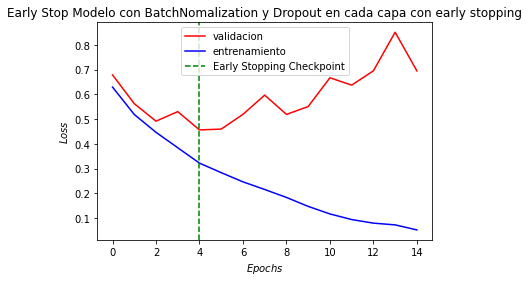

In [36]:
import matplotlib.pyplot as plt
f = plt.figure()
plt.plot( list_loss_validation, '-r', label="validacion")
plt.plot( list_loss_train, '-b', label="entrenamiento")
# find position of lowest validation loss
minposs = list_loss_validation.index(min(list_loss_validation)) 
plt.axvline(minposs, linestyle='--', color='g',label='Early Stopping Checkpoint')

plt.ylabel('$Loss$')
plt.xlabel('$Epochs$')
plt.title('Early Stop Modelo con BatchNomalization y Dropout en cada capa con early stopping')
plt.legend()
plt.show()

### Modelo 2 - con BatchNorm en cada capa Sin Dropout item 4

In [37]:
###Definicion de hiperparametros funcion loss y optimizador
model         = CNN2(num_classes).to(device)
loss_fn       = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam(model.parameters(), lr = learning_rate)

print([e.shape for e in model.fc.parameters()])

[torch.Size([4, 20736]), torch.Size([4])]


In [38]:
%%time
list_loss_train,list_loss_validation, best_loss, model = train(model,optimizer,loss_fn, num_epochs=15)

Epoch [1/15], Step [100/307], Loss: 1.7495
Epoch [1/15], Step [200/307], Loss: 3.8914
Epoch [1/15], Step [300/307], Loss: 0.2719
Epoch 1 Training Loss: 1.7064365845549767 Validation Loss: 0.7828452407636426
Epoch [2/15], Step [100/307], Loss: 0.6576
Epoch [2/15], Step [200/307], Loss: 0.2841
Epoch [2/15], Step [300/307], Loss: 0.1054
Epoch 2 Training Loss: 1.059628969853204 Validation Loss: 0.47635617962276394
Epoch [3/15], Step [100/307], Loss: 0.3259
Epoch [3/15], Step [200/307], Loss: 3.3020
Epoch [3/15], Step [300/307], Loss: 1.4252
Epoch 3 Training Loss: 0.7223102118461985 Validation Loss: 0.4524341731078245
Epoch [4/15], Step [100/307], Loss: 0.4558
Epoch [4/15], Step [200/307], Loss: 0.6669
Epoch [4/15], Step [300/307], Loss: 0.0259
Epoch 4 Training Loss: 0.45811894089234284 Validation Loss: 0.32914713701360265
Epoch [5/15], Step [100/307], Loss: 0.0202
Epoch [5/15], Step [200/307], Loss: 0.9364
Epoch [5/15], Step [300/307], Loss: 0.7680
Epoch 5 Training Loss: 0.2959757327308411

In [39]:
with torch.no_grad():
    y_true = []
    y_pred = []  
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.float().to(device), labels.float().to(device)           
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        y_true.append(labels.cpu().data.numpy()) 
        y_pred.append(predicted.cpu().data.numpy())  
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the {} test images: {} %'.format(len(test_beta), 100 * correct / total))

Test Accuracy of the model on the 700 test images: 84.28571428571429 %


In [38]:
from sklearn.metrics import confusion_matrix
import itertools

confusion_matrix(list(itertools.chain(*y_true)), list(itertools.chain(*y_pred)))

array([[80, 16,  3,  1],
       [ 9, 84,  6,  1],
       [ 7, 26, 67,  0],
       [ 3,  3,  0, 94]], dtype=int64)

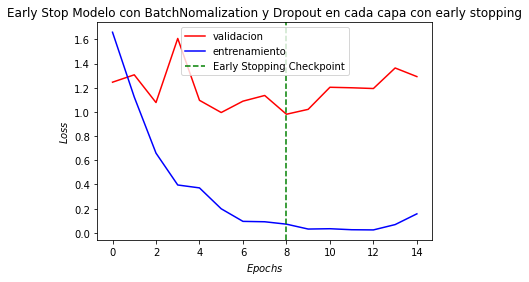

In [39]:
import matplotlib.pyplot as plt
f = plt.figure()
plt.plot( list_loss_validation, '-r', label="validacion")
plt.plot( list_loss_train, '-b', label="entrenamiento")
# find position of lowest validation loss
minposs = list_loss_validation.index(min(list_loss_validation)) 
plt.axvline(minposs, linestyle='--', color='g',label='Early Stopping Checkpoint')

plt.ylabel('$Loss$')
plt.xlabel('$Epochs$')
plt.title('Early Stop Modelo con BatchNomalization y Dropout en cada capa con early stopping')
plt.legend()
plt.show()

### Modelo 3 - sin BatchNorm con Dropout

In [25]:
model         = CNN3(num_classes).to(device)
loss_fn       = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam(model.parameters(), lr = learning_rate)

print([e.shape for e in model.fc.parameters()])

[torch.Size([4, 20736]), torch.Size([4])]


In [26]:
%%time
list_loss_train,list_loss_validation, best_loss, model = train(model,optimizer,loss_fn, num_epochs=15)

Epoch [1/15], Step [100/307], Loss: 1.1359
Epoch [1/15], Step [200/307], Loss: 0.7659
Epoch [1/15], Step [300/307], Loss: 0.6870
Epoch 1 Training Loss: 0.9958852533408795 Validation Loss: 0.42116973108865996
Epoch [2/15], Step [100/307], Loss: 0.8941
Epoch [2/15], Step [200/307], Loss: 0.7630
Epoch [2/15], Step [300/307], Loss: 0.8106
Epoch 2 Training Loss: 0.8728132244041766 Validation Loss: 0.4271866015412591
Epoch [3/15], Step [100/307], Loss: 0.9171
Epoch [3/15], Step [200/307], Loss: 0.5610
Epoch [3/15], Step [300/307], Loss: 0.5142
Epoch 3 Training Loss: 0.8074210958876905 Validation Loss: 0.3894520327448845
Epoch [4/15], Step [100/307], Loss: 0.5579
Epoch [4/15], Step [200/307], Loss: 0.6963
Epoch [4/15], Step [300/307], Loss: 0.9588
Epoch 4 Training Loss: 0.7466046137899063 Validation Loss: 0.34404431656003
Epoch [5/15], Step [100/307], Loss: 0.4663
Epoch [5/15], Step [200/307], Loss: 0.5304
Epoch [5/15], Step [300/307], Loss: 0.6899
Epoch 5 Training Loss: 0.6560578759796069 Va

In [27]:
with torch.no_grad():
    y_true = []
    y_pred = []  
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.float().to(device), labels.float().to(device)           
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        y_true.append(labels.cpu().data.numpy()) 
        y_pred.append(predicted.cpu().data.numpy())  
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the {} test images: {} %'.format(len(test_beta), 100 * correct / total))

Test Accuracy of the model on the 700 test images: 81.0 %


In [28]:
from sklearn.metrics import confusion_matrix
import itertools

confusion_matrix(list(itertools.chain(*y_true)), list(itertools.chain(*y_pred)))

array([[169,  18,  12,   1],
       [ 16, 153,  21,  10],
       [ 19,  31, 150,   0],
       [  0,   3,   2,  95]], dtype=int64)

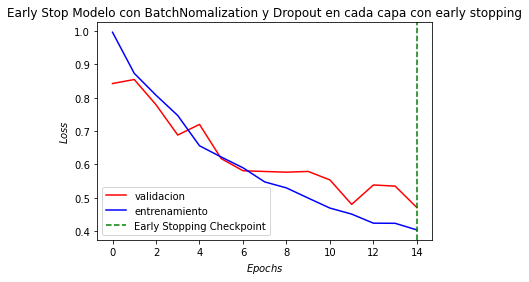

In [29]:
import matplotlib.pyplot as plt
f = plt.figure()
plt.plot( list_loss_validation, '-r', label="validacion")
plt.plot( list_loss_train, '-b', label="entrenamiento")
# find position of lowest validation loss
minposs = list_loss_validation.index(min(list_loss_validation)) 
plt.axvline(minposs, linestyle='--', color='g',label='Early Stopping Checkpoint')

plt.ylabel('$Loss$')
plt.xlabel('$Epochs$')
plt.title('Early Stop Modelo con BatchNomalization y Dropout en cada capa con early stopping')
plt.legend()
plt.show()

### Modelo 4 - con BatchNorm con Dropout en cada capa - item 5

In [30]:
model         = CNN4(num_classes).to(device)
loss_fn       = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam(model.parameters(), lr = learning_rate)

print([e.shape for e in model.fc.parameters()])

[torch.Size([4, 20736]), torch.Size([4])]


In [31]:
%%time
list_loss_train,list_loss_validation, best_loss, model = train(model,optimizer,loss_fn, num_epochs=15)

Epoch [1/15], Step [100/307], Loss: 1.4379
Epoch [1/15], Step [200/307], Loss: 0.8180
Epoch [1/15], Step [300/307], Loss: 2.2863
Epoch 1 Training Loss: 1.318458706528822 Validation Loss: 0.6078235005790537
Epoch [2/15], Step [100/307], Loss: 2.0366
Epoch [2/15], Step [200/307], Loss: 1.2839
Epoch [2/15], Step [300/307], Loss: 1.0690
Epoch 2 Training Loss: 1.284541738004172 Validation Loss: 0.6390671381218866
Epoch [3/15], Step [100/307], Loss: 0.3486
Epoch [3/15], Step [200/307], Loss: 0.7963
Epoch [3/15], Step [300/307], Loss: 2.2195
Epoch 3 Training Loss: 1.1616285516780342 Validation Loss: 0.5272526448084549
Epoch [4/15], Step [100/307], Loss: 1.0109
Epoch [4/15], Step [200/307], Loss: 0.7847
Epoch [4/15], Step [300/307], Loss: 0.8610
Epoch 4 Training Loss: 1.0236364441168424 Validation Loss: 0.4991160563447259
Epoch [5/15], Step [100/307], Loss: 1.1485
Epoch [5/15], Step [200/307], Loss: 0.5219
Epoch [5/15], Step [300/307], Loss: 0.4866
Epoch 5 Training Loss: 0.8791051971743563 Val

In [32]:
with torch.no_grad():
    y_true = []
    y_pred = []  
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.float().to(device), labels.float().to(device)           
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        y_true.append(labels.cpu().data.numpy()) 
        y_pred.append(predicted.cpu().data.numpy())  
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the {} test images: {} %'.format(len(test_beta), 100 * correct / total))

Test Accuracy of the model on the 700 test images: 82.28571428571429 %


In [33]:
from sklearn.metrics import confusion_matrix
import itertools

confusion_matrix(list(itertools.chain(*y_true)), list(itertools.chain(*y_pred)))

array([[176,  10,  14,   0],
       [ 16, 147,  32,   5],
       [ 16,  28, 156,   0],
       [  0,   2,   1,  97]], dtype=int64)

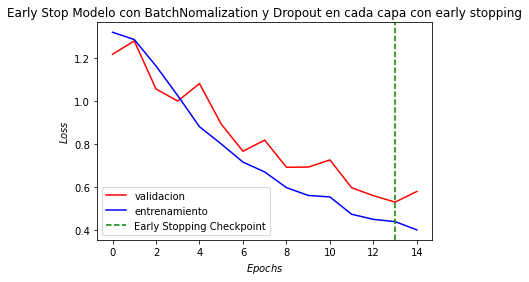

In [34]:
import matplotlib.pyplot as plt
f = plt.figure()
plt.plot( list_loss_validation, '-r', label="validacion")
plt.plot( list_loss_train, '-b', label="entrenamiento")
# find position of lowest validation loss
minposs = list_loss_validation.index(min(list_loss_validation)) 
plt.axvline(minposs, linestyle='--', color='g',label='Early Stopping Checkpoint')

plt.ylabel('$Loss$')
plt.xlabel('$Epochs$')
plt.title('Early Stop Modelo con BatchNomalization y Dropout en cada capa con early stopping')
plt.legend()
plt.show()

### Modelo 5 - con BatchNorm con Dropout solo primera capa item 6

In [35]:
model         = CNN5(num_classes).to(device)
loss_fn       = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam(model.parameters(), lr = learning_rate)

print([e.shape for e in model.fc.parameters()])

[torch.Size([4, 20736]), torch.Size([4])]


In [36]:
%%time
list_loss_train,list_loss_validation, best_loss, model = train(model,optimizer,loss_fn, num_epochs=15)

Epoch [1/15], Step [100/307], Loss: 0.8803
Epoch [1/15], Step [200/307], Loss: 0.6687
Epoch [1/15], Step [300/307], Loss: 0.1955
Epoch 1 Training Loss: 0.866870427801477 Validation Loss: 0.29804808781905606
Epoch [2/15], Step [100/307], Loss: 0.8057
Epoch [2/15], Step [200/307], Loss: 0.5421
Epoch [2/15], Step [300/307], Loss: 0.7137
Epoch 2 Training Loss: 0.5709799520841251 Validation Loss: 0.2976581796326421
Epoch [3/15], Step [100/307], Loss: 0.4307
Epoch [3/15], Step [200/307], Loss: 0.5202
Epoch [3/15], Step [300/307], Loss: 0.4248
Epoch 3 Training Loss: 0.5132061346685848 Validation Loss: 0.2717256397008896
Epoch [4/15], Step [100/307], Loss: 0.5395
Epoch [4/15], Step [200/307], Loss: 0.6586
Epoch [4/15], Step [300/307], Loss: 0.6369
Epoch 4 Training Loss: 0.4600546278472055 Validation Loss: 0.251894016453827
Epoch [5/15], Step [100/307], Loss: 0.5784
Epoch [5/15], Step [200/307], Loss: 0.4084
Epoch [5/15], Step [300/307], Loss: 0.7759
Epoch 5 Training Loss: 0.41392537839832055 V

In [37]:
with torch.no_grad():
    y_true = []
    y_pred = []  
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.float().to(device), labels.float().to(device)           
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        y_true.append(labels.cpu().data.numpy()) 
        y_pred.append(predicted.cpu().data.numpy())  
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the {} test images: {} %'.format(len(test_beta), 100 * correct / total))

Test Accuracy of the model on the 700 test images: 82.71428571428571 %


In [39]:
from sklearn.metrics import confusion_matrix
import itertools

confusion_matrix(list(itertools.chain(*y_true)), list(itertools.chain(*y_pred)))

array([[172,   6,  20,   2],
       [  6, 151,  36,   7],
       [  8,  30, 161,   1],
       [  1,   2,   2,  95]], dtype=int64)

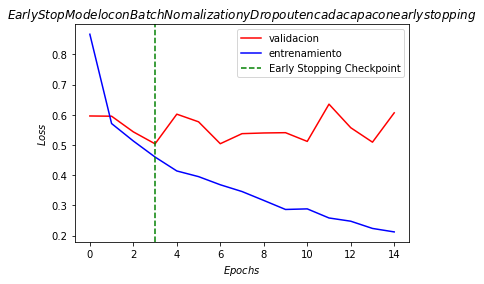

In [40]:
import matplotlib.pyplot as plt
f = plt.figure()
plt.plot( list_loss_validation, '-r', label="validacion")
plt.plot( list_loss_train, '-b', label="entrenamiento")
# find position of lowest validation loss
minposs = list_loss_validation.index(min(list_loss_validation)) 
plt.axvline(minposs, linestyle='--', color='g',label='Early Stopping Checkpoint')

plt.ylabel('$Loss$')
plt.xlabel('$Epochs$')
plt.title('$Early Stop Modelo con BatchNomalization y Dropout en cada capa con early stopping$')
plt.legend()
plt.show()

## 7. Pruebe utilizando EarlyStopping, grafique funcion de perdida

### Early Stopping

In [56]:
model         = CNN3(num_classes).to(device)
loss_fn       = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam(model.parameters(), lr = learning_rate)

print([e.shape for e in model.fc.parameters()])

[torch.Size([4, 20736]), torch.Size([4])]


In [57]:
%%time
list_loss_train,list_loss_validation, best_loss, model = train(model,optimizer,loss_fn, num_epochs=15)

Epoch [1/15], Step [100/175], Loss: 0.6882
Epoch 1 Training Loss: 0.9926903215476445 Validation Loss: 0.4064865326881409
Epoch [2/15], Step [100/175], Loss: 1.0026
Epoch 2 Training Loss: 0.8266854199341366 Validation Loss: 0.4098784303665161
Epoch [3/15], Step [100/175], Loss: 0.6893
Epoch 3 Training Loss: 0.7874479254654475 Validation Loss: 0.36509122550487516
Epoch [4/15], Step [100/175], Loss: 0.6509
Epoch 4 Training Loss: 0.7384243638174874 Validation Loss: 0.38767683148384097
Epoch [5/15], Step [100/175], Loss: 0.8126
Epoch 5 Training Loss: 0.7233996782132558 Validation Loss: 0.37009877324104307
Epoch [6/15], Step [100/175], Loss: 0.4721
Epoch 6 Training Loss: 0.6925842209373202 Validation Loss: 0.3706278592348099
Epoch [7/15], Step [100/175], Loss: 1.2160
Epoch 7 Training Loss: 0.662247474874769 Validation Loss: 0.3320874559879303
Epoch [8/15], Step [100/175], Loss: 0.4192
Epoch 8 Training Loss: 0.6418088184935706 Validation Loss: 0.3551059186458588
Epoch [9/15], Step [100/175], 

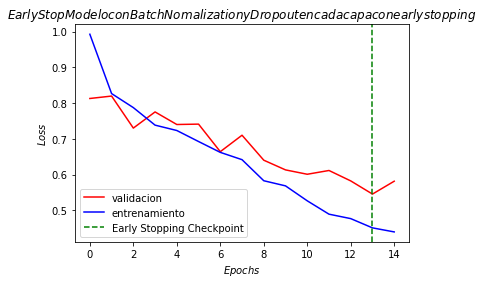

In [58]:
import matplotlib.pyplot as plt
f = plt.figure()
plt.plot( list_loss_validation, '-r', label="validacion")
plt.plot( list_loss_train, '-b', label="entrenamiento")
# find position of lowest validation loss
minposs = list_loss_validation.index(min(list_loss_validation)) 
plt.axvline(minposs, linestyle='--', color='g',label='Early Stopping Checkpoint')

plt.ylabel('$Loss$')
plt.xlabel('$Epochs$')
plt.title('$Early Stop Modelo con BatchNomalization y Dropout en cada capa con early stopping$')
plt.legend()
plt.show()

## 8. 70% para entrenamiento y el resto para testing

In [59]:

#path_Covid = r'C:\Users\ASUS\Desktop\UTEC\Redes Neuronales (CNN)\Clasificador\Dataset 2\COVID' 
#path_Normal = r'C:\Users\ASUS\Desktop\UTEC\Redes Neuronales (CNN)\Clasificador\Dataset 2\Normal'
#path_Lung_Opacity = r'C:\Users\ASUS\Desktop\UTEC\Redes Neuronales (CNN)\Clasificador\Dataset 2\Lung_Opacity'
#path_Viral_Pneumonia = r'C:\Users\ASUS\Desktop\UTEC\Redes Neuronales (CNN)\Clasificador\Dataset 2\Viral Pneumonia'


path_Covid = r'C:\Users\Cracker31\Desktop\JOSE\maestria\UTEC\ciclo2\ai\proyecto3\archive\COVID-19_Radiography_Dataset\COVID' 
path_Normal = r'C:\Users\Cracker31\Desktop\JOSE\maestria\UTEC\ciclo2\ai\proyecto3\archive\COVID-19_Radiography_Dataset\Normal'
path_Lung_Opacity = r'C:\Users\Cracker31\Desktop\JOSE\maestria\UTEC\ciclo2\ai\proyecto3\archive\COVID-19_Radiography_Dataset\Lung_Opacity'
path_Viral_Pneumonia = r'C:\Users\Cracker31\Desktop\JOSE\maestria\UTEC\ciclo2\ai\proyecto3\archive\COVID-19_Radiography_Dataset\Viral Pneumonia'

In [60]:
#### Funcion para leer imagenes dentro de una carpeta
width = 299
height = 299
def imageReading (path,files):
    folderFilesids = os.listdir(path)
    filesRandom = random.sample(folderFilesids, files)
    #folderFilesids = os.listdir(path)
    images = np.zeros((files, height, width))
    for count, n in enumerate(filesRandom):
        if(count == files):
          break
        else:
          path1 = path + '\\' + n
          originalImage = imread(path1)
          if (len(originalImage.shape)==2):
              originalImage = imread(path1)[:,:]
          if (len(originalImage.shape)==3):
              originalImage = imread(path1)[:,:,0]
          #print(originalImage.shape)
          images[count] = originalImage
    imshow(images[0])
    plt.show()
    return images
"""
def imageReading (path):
    folderFilesids = os.listdir(path)
    images = np.zeros((len(folderFilesids), height, width))
    for count, n in enumerate(folderFilesids):
        path1 = path + '\\' + n
        originalImage = imread(path1)
        if (len(originalImage.shape)==2):
            originalImage = imread(path1)[:,:]
        if (len(originalImage.shape)==3):
            originalImage = imread(path1)[:,:,0]
        #print(originalImage.shape)
        images[count] = originalImage
    imshow(images[0])
    plt.show()
    return images
"""

"\ndef imageReading (path):\n    folderFilesids = os.listdir(path)\n    images = np.zeros((len(folderFilesids), height, width))\n    for count, n in enumerate(folderFilesids):\n        path1 = path + '\\' + n\n        originalImage = imread(path1)\n        if (len(originalImage.shape)==2):\n            originalImage = imread(path1)[:,:]\n        if (len(originalImage.shape)==3):\n            originalImage = imread(path1)[:,:,0]\n        #print(originalImage.shape)\n        images[count] = originalImage\n    imshow(images[0])\n    plt.show()\n    return images\n"

C:\Users\Cracker31\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


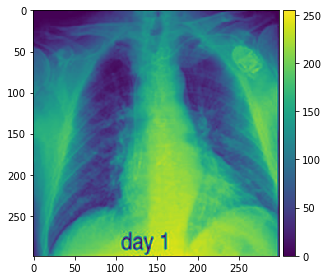

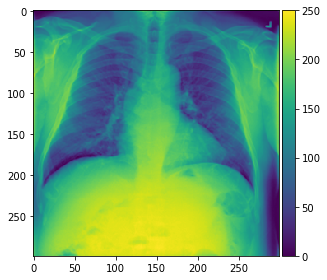

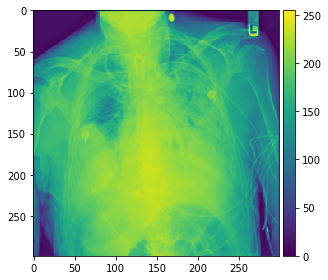

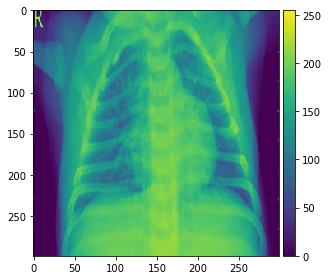

In [61]:
cantintidadImg = 500
covid = imageReading(path_Covid,cantintidadImg)
normal = imageReading(path_Normal,cantintidadImg)
Lung_Opacity = imageReading(path_Lung_Opacity,cantintidadImg)
Viral_Pneumonia = imageReading(path_Viral_Pneumonia,cantintidadImg)

In [62]:
print("covid.shape {} ,normal.shape {} ,Lung_Opacity.shape {} ,Viral_Pneumonia.shape {} ".format(covid.shape,normal.shape,Lung_Opacity.shape,Viral_Pneumonia.shape))

covid.shape (500, 299, 299) ,normal.shape (500, 299, 299) ,Lung_Opacity.shape (500, 299, 299) ,Viral_Pneumonia.shape (500, 299, 299) 


In [63]:
covid = torch.from_numpy(np.array(covid).reshape(-1,1,299,299)) ## torch se convierte nuestra data en tensor - Aumenta la dimension.
normal = torch.from_numpy(np.array(normal).reshape(-1,1,299,299)) # (-1: Cantidad de imagenes, 1: gris o color, 299 x 299: tamaño de la imagen
Lung_Opacity = torch.from_numpy(np.array(Lung_Opacity).reshape(-1,1,299,299))
Viral_Pneumonia = torch.from_numpy(np.array(Viral_Pneumonia).reshape(-1,1,299,299))

In [64]:
covid.shape

torch.Size([500, 1, 299, 299])

In [65]:
covid[0]

tensor([[[  1.,   1.,   1.,  ...,   1.,   1.,   1.],
         [  1.,   1.,   1.,  ...,   1.,   1.,   1.],
         [  1.,   1.,   1.,  ...,   1.,   1.,   1.],
         ...,
         [ 28.,  31.,  35.,  ..., 188., 138.,  49.],
         [ 28.,  31.,  35.,  ..., 189., 138.,  51.],
         [ 28.,  31.,  35.,  ..., 190., 139.,  52.]]], dtype=torch.float64)

### Agregamos las etiquetas y transformamos a tuple

In [66]:
img_covidlist = []
for i in range(covid.shape[0]):
      img_covidlist.append((covid[i]/255.0,0.0))

img_normallist = []
for i in range(normal.shape[0]):
      img_normallist.append((normal[i]/255.0,1.0))
        
img_Lung_Opacitylist = []
for i in range(Lung_Opacity.shape[0]):
      img_Lung_Opacitylist.append((Lung_Opacity[i]/255.0,2.0))
    
img_Viral_Pneumonialist = []
for i in range(Viral_Pneumonia.shape[0]):
      img_Viral_Pneumonialist.append((Viral_Pneumonia[i]/255.0,3.0))

In [67]:
img_normallist[0]

(tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0431, 0.1020, 0.2078],
          [0.0039, 0.0000, 0.0000,  ..., 0.0275, 0.0392, 0.0627],
          [0.0353, 0.0118, 0.0000,  ..., 0.0235, 0.0235, 0.0157],
          ...,
          [0.7412, 0.7059, 0.6706,  ..., 0.1647, 0.2471, 0.3020],
          [0.7373, 0.6980, 0.6706,  ..., 0.1725, 0.2510, 0.3137],
          [0.7373, 0.6980, 0.6706,  ..., 0.1804, 0.2588, 0.3216]]],
        dtype=torch.float64),
 1.0)

In [69]:
import random
random.shuffle(img_covidlist)
covid_train = img_covidlist[0:int(len(img_covidlist)*0.7)]
covid_test = img_covidlist[int(len(img_covidlist)*0.7):]

random.shuffle(img_normallist)
normal_train = img_normallist[0:int(len(img_normallist)*0.7)]
normal_test = img_normallist[int(len(img_normallist)*0.7):]

random.shuffle(img_Lung_Opacitylist)
Lung_Opacitylist_train = img_Lung_Opacitylist[0:int(len(img_Lung_Opacitylist)*0.7)]
Lung_Opacitylist_test = img_Lung_Opacitylist[int(len(img_Lung_Opacitylist)*0.7):]

random.shuffle(img_Viral_Pneumonialist)
Viral_Pneumonialist_train = img_Viral_Pneumonialist[0:int(len(img_Viral_Pneumonialist)*0.7)]
Viral_Pneumonialist_test = img_Viral_Pneumonialist[int(len(img_Viral_Pneumonialist)*0.7):]

### COVID - NORMAL - LUNG OPACITY - VIRAL PNEUMONIALIST

In [70]:
print("El tamaño de la muestra COVID del training es {} y del test es {}"\
      .format(len(covid_train),len(covid_test)))
print("El tamaño de la muestra NORMAL del training es {}, y del test es {}"\
      .format(len(normal_train),len(normal_test)))
print("El tamaño de la muestra LUNG_OPACITY del training es {}, y del test es {}"\
      .format(len(Lung_Opacitylist_train),len(Lung_Opacitylist_test)))
print("El tamaño de la muestra VIRAL PNEUMONIA del training es {}, y del test es {}"\
      .format(len(Viral_Pneumonialist_train),len(Viral_Pneumonialist_test)))

El tamaño de la muestra COVID del training es 350 y del test es 150
El tamaño de la muestra NORMAL del training es 350, y del test es 150
El tamaño de la muestra LUNG_OPACITY del training es 350, y del test es 150
El tamaño de la muestra VIRAL PNEUMONIA del training es 350, y del test es 150


### Unir Train de Covid y Normal y Test de Covid y Normal 

In [71]:
batch_size = 16
train_loader = torch.utils.data.DataLoader(dataset=train_beta, batch_size=batch_size, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_beta, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_beta, batch_size=batch_size, shuffle=True)

### Modelo 3 - sin BatchNorm con Dropout

In [72]:
torch.manual_seed(22)
#hyperparameter 
num_classes = 4
learning_rate =  0.001
num_epochs = 20

class CNN3(nn.Module):
    def __init__(self, num_classes=4):
        super(CNN3, self).__init__()
        #input 299x299
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=4, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2,padding=0),
            nn.Dropout(p=0.5)) #150 x 150
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=0),  #146
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.2))  #73x73
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=0),  #36
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.7))
        
        self.fc = nn.Linear(18*18*64, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        #print('aviso1')
        out = self.layer2(out)
        #print('aviso2')
        out = self.layer3(out)
        #print('aviso3')
        out = out.reshape(out.size(0), -1)
        #print('aviso4')
        out = self.fc(out)
        return out


In [73]:
model         = CNN1(num_classes).to(device)
loss_fn       = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam(model.parameters(), lr = learning_rate)

print([e.shape for e in model.fc.parameters()])

[torch.Size([4, 20736]), torch.Size([4])]


In [74]:
def train(model, optimizer, loos_fn, num_epochs):
    loss_vals = []
    running_loss =0.0
    # train the model
    total_step = len(train_loader)  # el train loader es el motor que se encarga de sacar las imagenes del train_set

    list_loss_train= []
    list_loss_validation = []
    list_time = []
    j=0
    
    best_loss = 0
    
    # Train the model
    for epoch in range(num_epochs):
        train_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images = images.float().to(device)
            labels = labels.long().to(device)
            # forward 
            output = model(images).float()
            #Calucla el loss
            loss   = loss_fn(output, labels)
            # change the params
            # Clear the gradients of all optimized variables
            optimizer.zero_grad()
            # Backward 
            loss.backward()
            #parametros update
            optimizer.step()
            train_loss +=loss.item()
            list_time.append(j)
            j+=1

            if (i+1) % 100 == 0:
                  print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                        .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
                    
        list_loss_train.append(train_loss / len(train_loader))
        
        #validation of the model
        valid_loss =0.0   
        for i, (images, labels) in enumerate(test_loader):
            images = images.float().to(device)
            labels = labels.long().to(device)
            
            # Forward Pass
            output = model(images).float()
            # Find the Loss
            loss   = loss_fn(output, labels)
            # Calculate loss
            valid_loss +=loss.item()
        #Save loss in a List
        
        list_loss_validation.append(valid_loss / len(test_loader))
        ###Early stopping###
        if valid_loss > best_loss:
            best_loss = valid_loss
            # At this point also save a snapshot of the current model
            torch.save(model, 'my_model_best_loss.pth')
        
        print(f'Epoch {epoch+1} Training Loss: {train_loss / len(train_loader)} Validation Loss: {valid_loss / len(validation_loader)}')  
    
    print('Finished Training Trainset')
    return list_loss_train,list_loss_validation, best_loss, model

In [75]:
%%time
list_loss_train,list_loss_validation, best_loss, model = train(model,optimizer,loss_fn, num_epochs=15)

Epoch [1/15], Step [100/175], Loss: 0.7760
Epoch 1 Training Loss: 0.9385423253263746 Validation Loss: 0.42159801959991455
Epoch [2/15], Step [100/175], Loss: 0.8048
Epoch 2 Training Loss: 0.7261878059591566 Validation Loss: 0.3496621650457382
Epoch [3/15], Step [100/175], Loss: 1.1173
Epoch 3 Training Loss: 0.6396667027473449 Validation Loss: 0.3385868829488754
Epoch [4/15], Step [100/175], Loss: 0.6556
Epoch 4 Training Loss: 0.5790402909687588 Validation Loss: 0.27342716097831726
Epoch [5/15], Step [100/175], Loss: 0.6600
Epoch 5 Training Loss: 0.49675194697720665 Validation Loss: 0.2592481911182404
Epoch [6/15], Step [100/175], Loss: 0.3306
Epoch 6 Training Loss: 0.4450754333393914 Validation Loss: 0.24231312334537505
Epoch [7/15], Step [100/175], Loss: 0.2391
Epoch 7 Training Loss: 0.3763877642580441 Validation Loss: 0.2667999854683876
Epoch [8/15], Step [100/175], Loss: 0.6353
Epoch 8 Training Loss: 0.3362045051796096 Validation Loss: 0.27593607127666475
Epoch [9/15], Step [100/175

In [76]:
with torch.no_grad():
    y_true = []
    y_pred = []  
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.float().to(device), labels.float().to(device)           
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        y_true.append(labels.cpu().data.numpy()) 
        y_pred.append(predicted.cpu().data.numpy())  
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the {} test images: {} %'.format(len(test_beta), 100 * correct / total))

Test Accuracy of the model on the 400 test images: 79.25 %


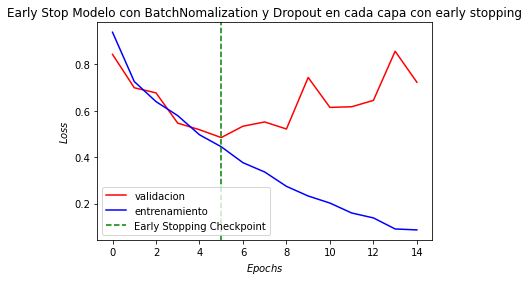

In [77]:
import matplotlib.pyplot as plt
f = plt.figure()
plt.plot( list_loss_validation, '-r', label="validacion")
plt.plot( list_loss_train, '-b', label="entrenamiento")
# find position of lowest validation loss
minposs = list_loss_validation.index(min(list_loss_validation)) 
plt.axvline(minposs, linestyle='--', color='g',label='Early Stopping Checkpoint')

plt.ylabel('$Loss$')
plt.xlabel('$Epochs$')
plt.title('Early Stop Modelo con BatchNomalization y Dropout en cada capa con early stopping')
plt.legend()
plt.show()

In [78]:
from sklearn.metrics import confusion_matrix
import itertools

confusion_matrix(list(itertools.chain(*y_true)), list(itertools.chain(*y_pred)))

array([[84,  5,  9,  2],
       [10, 59, 28,  3],
       [ 9,  9, 79,  3],
       [ 3,  1,  1, 95]], dtype=int64)

In [79]:
%%time
list_loss_train,list_loss_validation, best_loss, model = train(model,optimizer,loss_fn, num_epochs=4)

Epoch [1/4], Step [100/175], Loss: 0.0717
Epoch 1 Training Loss: 0.05579476229314293 Validation Loss: 0.43780079275369643
Epoch [2/4], Step [100/175], Loss: 0.0671
Epoch 2 Training Loss: 0.0733579626253673 Validation Loss: 0.4358841128647327
Epoch [3/4], Step [100/175], Loss: 0.0108
Epoch 3 Training Loss: 0.08518315382268546 Validation Loss: 0.5265007211267948
Epoch [4/4], Step [100/175], Loss: 0.0127
Epoch 4 Training Loss: 0.03371519918620054 Validation Loss: 0.48028990991413595
Finished Training Trainset
Wall time: 9min 22s


In [80]:

%%time
# Clear the gradients of all optimized variables
optimizer.zero_grad()
list_loss_train,list_loss_validation, best_loss, model = train(model,optimizer,loss_fn, num_epochs=2)

Epoch [1/2], Step [100/175], Loss: 0.0408
Epoch 1 Training Loss: 0.037820823467378174 Validation Loss: 0.4791604452580214
Epoch [2/2], Step [100/175], Loss: 0.0116
Epoch 2 Training Loss: 0.03436586844851263 Validation Loss: 0.5710038036108017
Finished Training Trainset
Wall time: 4min 43s


In [81]:
from sklearn.metrics import confusion_matrix
import itertools

confusion_matrix(list(itertools.chain(*y_true)), list(itertools.chain(*y_pred)))

array([[84,  5,  9,  2],
       [10, 59, 28,  3],
       [ 9,  9, 79,  3],
       [ 3,  1,  1, 95]], dtype=int64)

In [82]:
with torch.no_grad():
    y_true = []
    y_pred = []  
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.float().to(device), labels.float().to(device)           
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        y_true.append(labels.cpu().data.numpy()) 
        y_pred.append(predicted.cpu().data.numpy())  
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the {} test images: {} %'.format(len(test_beta), 100 * correct / total))

Test Accuracy of the model on the 400 test images: 79.75 %
